In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
from scipy.interpolate import interp1d

# Sample monthly data (replace with your actual data)
monthly_inflation = pd.read_excel('/content/drive/MyDrive/time-series-project-datasets/Inflation.xlsx')

#monthly_inflation['inflation_china'] = monthly_inflation['inflation_china'].astype('float64')
monthly_inflation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             300 non-null    datetime64[ns]
 1   inflation_USA    296 non-null    float64       
 2   inflation_kor    298 non-null    float64       
 3   inflation_china  298 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.5 KB


In [ ]:
# Create a Pandas DataFrame
df = pd.DataFrame(monthly_inflation)

# Convert 'Month' column to datetime format
df = df.set_index('Date')
df = df.loc['2001-01-01':'2024-10-1']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 2001-01-01 to 2024-10-01
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inflation_USA    284 non-null    float64
 1   inflation_kor    286 non-null    float64
 2   inflation_china  286 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


In [ ]:
df

,inflation_USA,inflation_kor,inflation_china
Date,,,
2001-01-01,2.88,3.44,0.72
2001-02-01,2.98,3.63,0.72
2001-03-01,2.96,4.01,0.72
2001-04-01,3.09,4.83,0.72
2001-05-01,3.07,5.26,0.72
...,...,...,...
2024-06-01,4.23,2.41,0.60
2024-07-01,4.16,2.55,0.40
2024-08-01,4.10,2.01,0.30


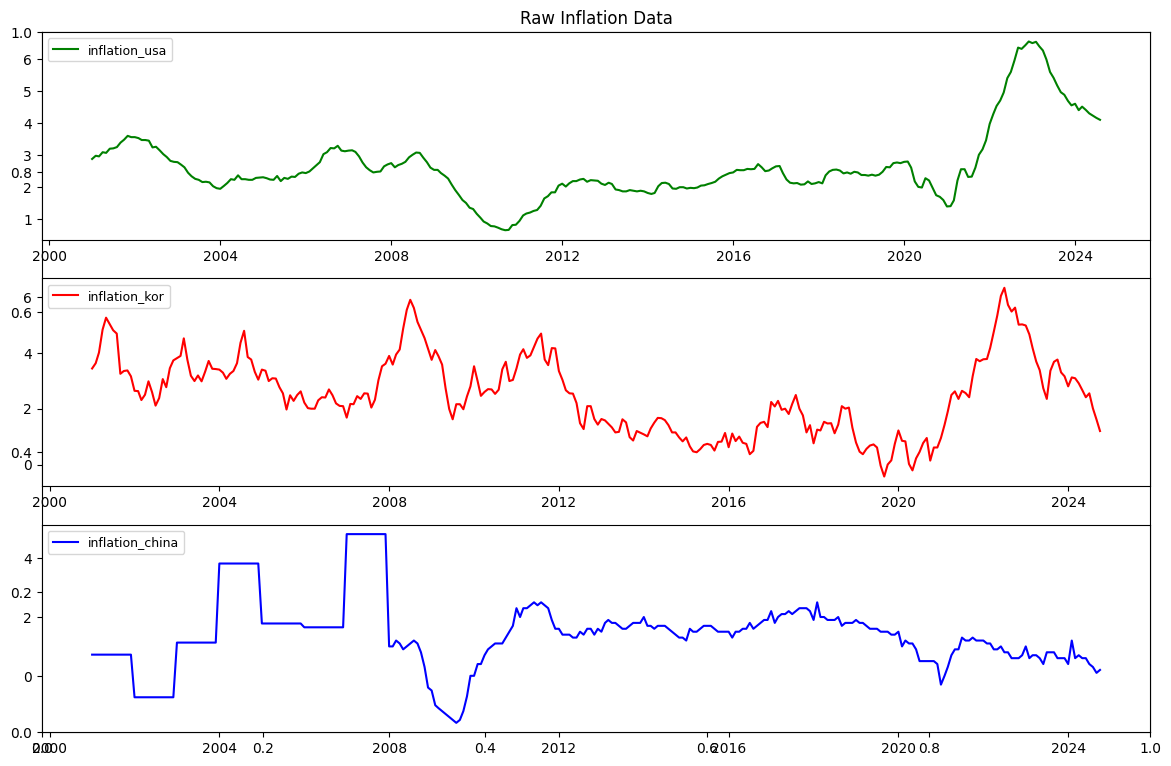

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Raw Inflation Data')
plt.subplot(3,1,1)
plt.plot(df['inflation_USA'], label='inflation_usa', color = 'green')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,2)
plt.plot(df['inflation_kor'], label='inflation_kor', color = 'red')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,3)
plt.plot(df['inflation_china'], label='inflation_china', color = 'blue')
plt.legend(loc='upper left',fontsize=9)

plt.tight_layout()
plt.show()

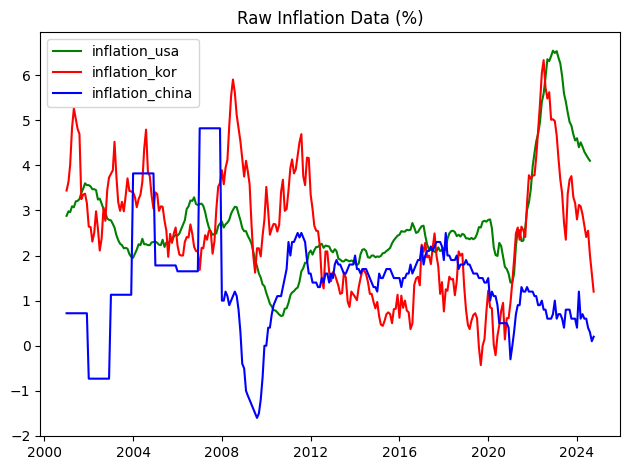

In [ ]:
plt.title('Raw Inflation Data (%)')
plt.figsize = (12, 8)
plt.plot(df['inflation_USA'], label='inflation_usa', color = 'green')
plt.plot(df['inflation_kor'], label='inflation_kor', color = 'red')
plt.plot(df['inflation_china'], label='inflation_china', color = 'blue')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Expand the DataFrame to daily level
df_expanded_copies = df.resample('D').ffill()
df_expanded_interpolate = df.resample('D').interpolate()


In [ ]:
df_expanded_copies

,inflation_USA,inflation_kor,inflation_china
Date,,,
2001-01-01,2.88,3.44,0.72
2001-01-02,2.88,3.44,0.72
2001-01-03,2.88,3.44,0.72
2001-01-04,2.88,3.44,0.72
2001-01-05,2.88,3.44,0.72
...,...,...,...
2024-09-27,NaN,1.61,0.10
2024-09-28,NaN,1.61,0.10
2024-09-29,NaN,1.61,0.10


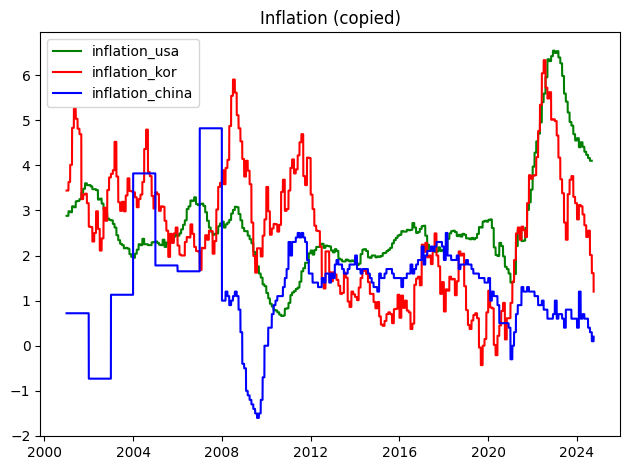

In [ ]:
from matplotlib import pyplot as plt
plt.figsize = (12, 8)
plt.plot(df_expanded_copies['inflation_USA'], label='inflation_usa', color = 'green')
plt.plot(df_expanded_copies['inflation_kor'], label='inflation_kor', color = 'red')
plt.plot(df_expanded_copies['inflation_china'], label='inflation_china', color = 'blue')
plt.title('Inflation (copied)')
plt.legend()
plt.tight_layout()
plt.show()

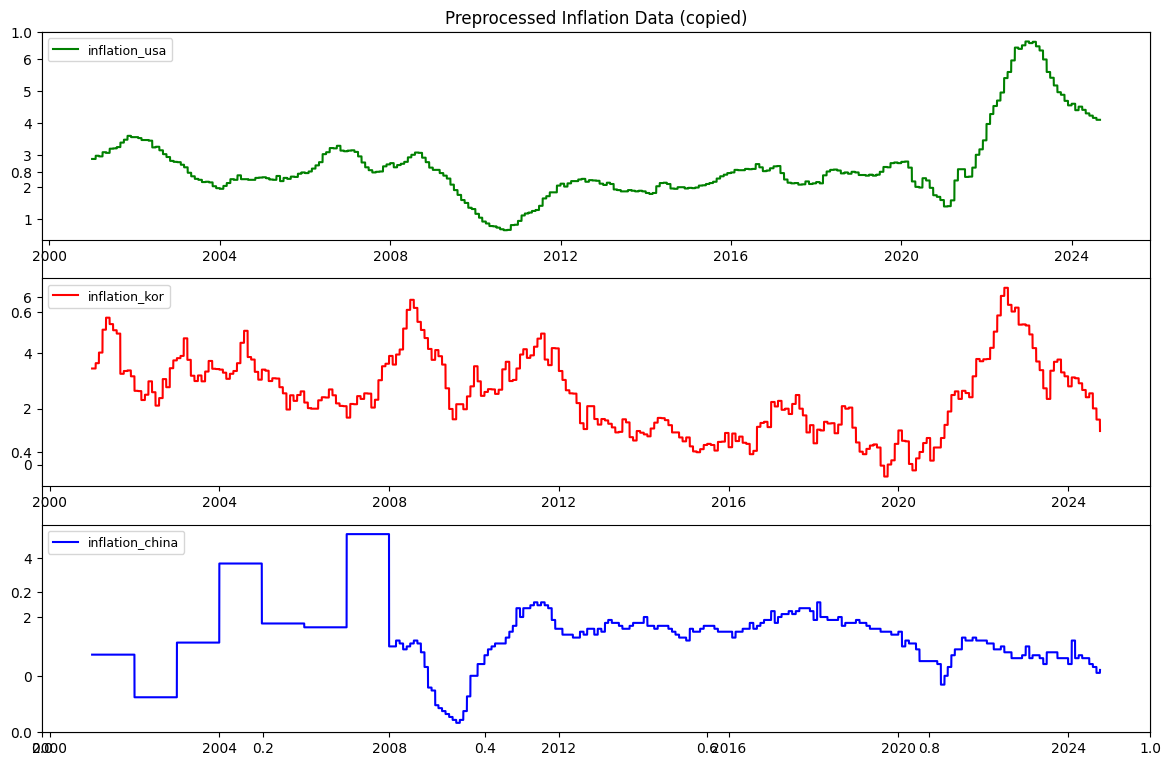

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Preprocessed Inflation Data (copied)')
plt.subplot(3,1,1)
plt.plot(df_expanded_copies['inflation_USA'], label='inflation_usa', color = 'green')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,2)
plt.plot(df_expanded_copies['inflation_kor'], label='inflation_kor', color = 'red')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,3)
plt.plot(df_expanded_copies['inflation_china'], label='inflation_china', color = 'blue')
plt.legend(loc='upper left',fontsize=9)

plt.tight_layout()
plt.show()

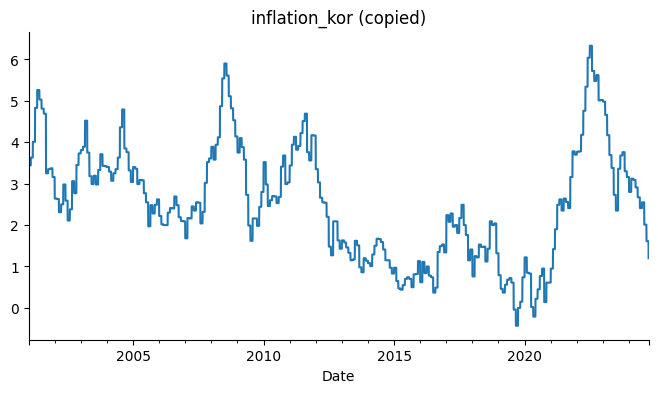

In [ ]:
from matplotlib import pyplot as plt
df_expanded_copies['inflation_kor'].plot(kind='line', figsize=(8, 4), title='inflation_kor (copied)')
plt.gca().spines[['top', 'right']].set_visible(False)

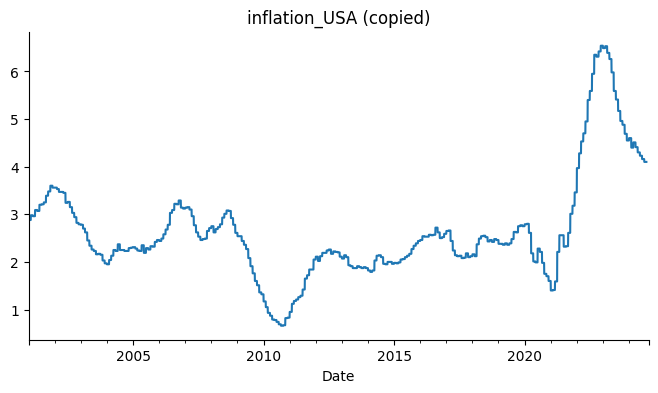

In [ ]:
from matplotlib import pyplot as plt
df_expanded_copies['inflation_USA'].plot(kind='line', figsize=(8, 4), title='inflation_USA (copied)')
plt.gca().spines[['top', 'right']].set_visible(False)

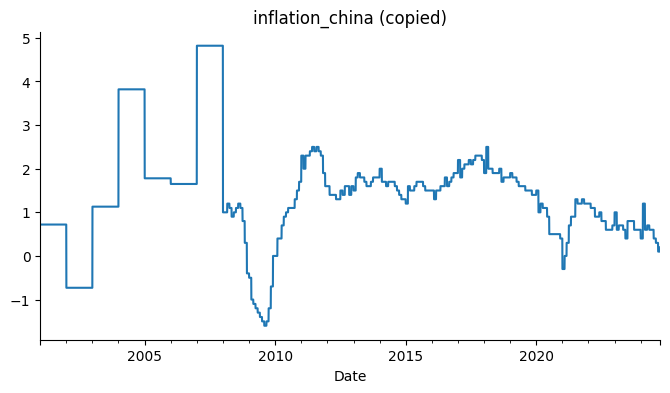

In [ ]:
from matplotlib import pyplot as plt
df_expanded_copies['inflation_china'].plot(kind='line', figsize=(8, 4), title='inflation_china (copied)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_expanded_copies['inflation_china'].loc['2008-01-01':]


,inflation_china
Date,
2008-01-01,1.0
2008-01-02,1.0
2008-01-03,1.0
2008-01-04,1.0
2008-01-05,1.0
...,...
2024-09-27,0.1
2024-09-28,0.1
2024-09-29,0.1


In [ ]:
df_expanded_interpolate

,inflation_USA,inflation_kor,inflation_china
Date,,,
2001-01-01,2.880000,3.440000,0.720000
2001-01-02,2.883226,3.446129,0.720000
2001-01-03,2.886452,3.452258,0.720000
2001-01-04,2.889677,3.458387,0.720000
2001-01-05,2.892903,3.464516,0.720000
...,...,...,...
2024-09-27,4.100000,1.254667,0.186667
2024-09-28,4.100000,1.241000,0.190000
2024-09-29,4.100000,1.227333,0.193333


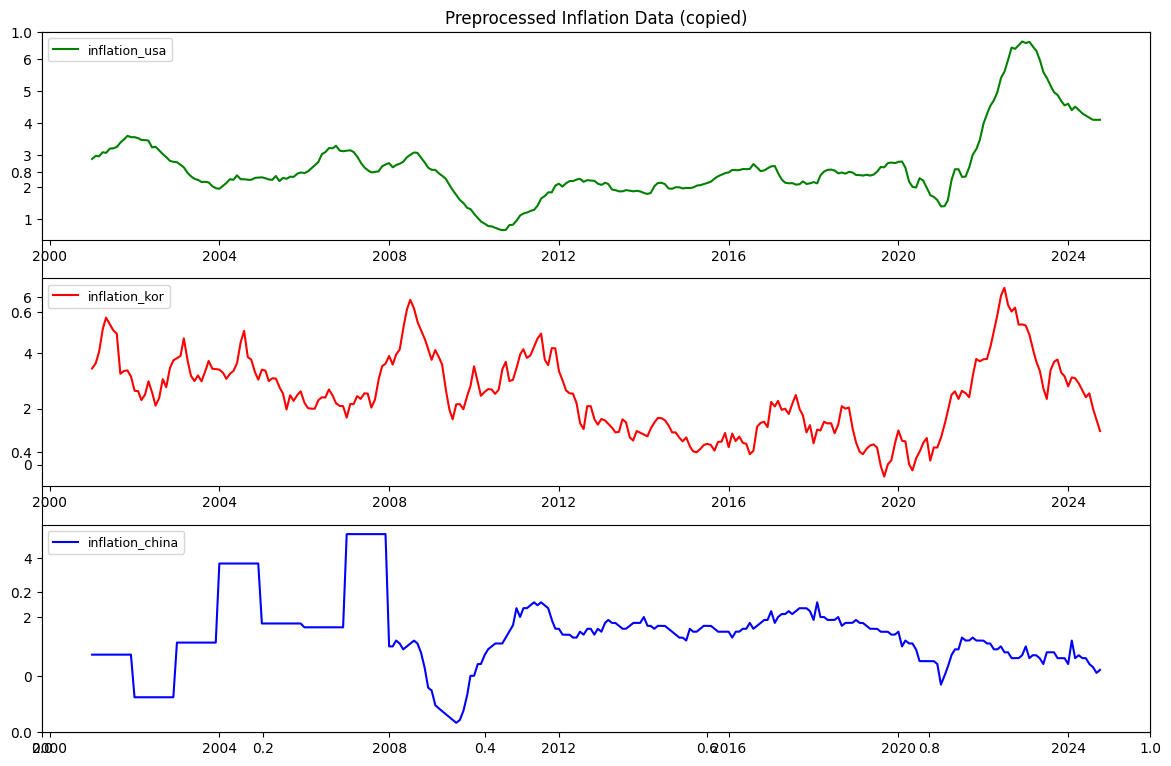

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Preprocessed Inflation Data (copied)')
plt.subplot(3,1,1)
plt.plot(df_expanded_interpolate['inflation_USA'], label='inflation_usa', color = 'green')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,2)
plt.plot(df_expanded_interpolate['inflation_kor'], label='inflation_kor', color = 'red')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(3,1,3)
plt.plot(df_expanded_interpolate['inflation_china'], label='inflation_china', color = 'blue')
plt.legend(loc='upper left',fontsize=9)

plt.tight_layout()
plt.show()

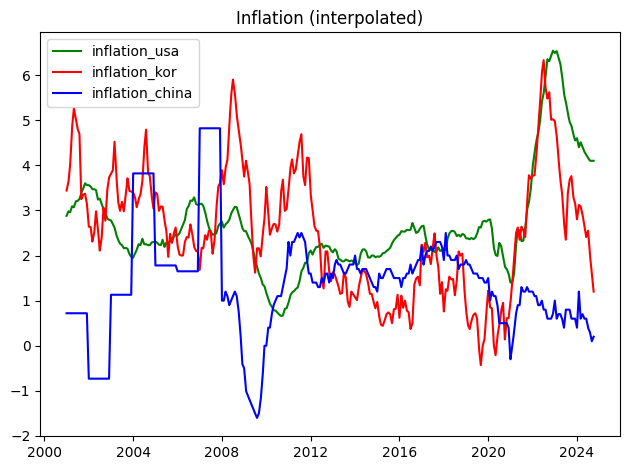

In [ ]:
from matplotlib import pyplot as plt
plt.figsize = (12, 8)
plt.plot(df_expanded_interpolate['inflation_USA'], label='inflation_usa', color = 'green')
plt.plot(df_expanded_interpolate['inflation_kor'], label='inflation_kor', color = 'red')
plt.plot(df_expanded_interpolate['inflation_china'], label='inflation_china', color = 'blue')
plt.title('Inflation (interpolated)')
plt.legend()
plt.tight_layout()
plt.show()

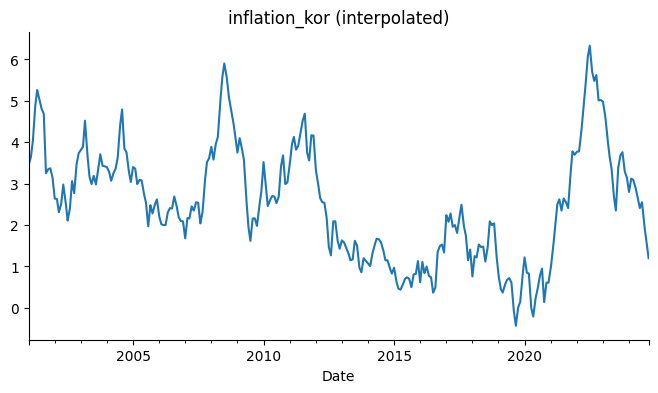

In [ ]:
df_expanded_interpolate['inflation_kor'].plot(kind='line', figsize=(8, 4), title='inflation_kor (interpolated)')
plt.gca().spines[['top', 'right']].set_visible(False)

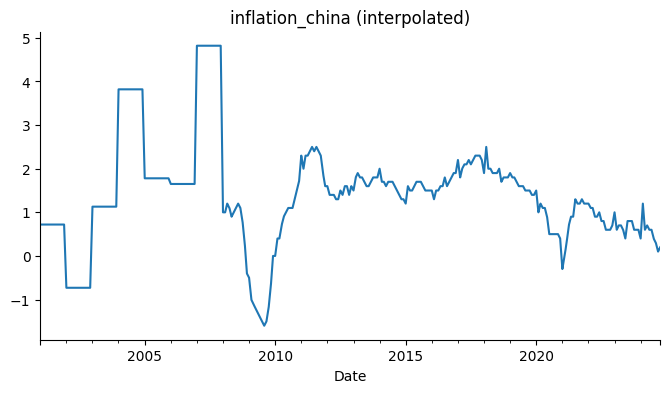

In [ ]:
from matplotlib import pyplot as plt
df_expanded_interpolate['inflation_china'].plot(kind='line', figsize=(8, 4), title='inflation_china (interpolated)')
plt.gca().spines[['top', 'right']].set_visible(False)

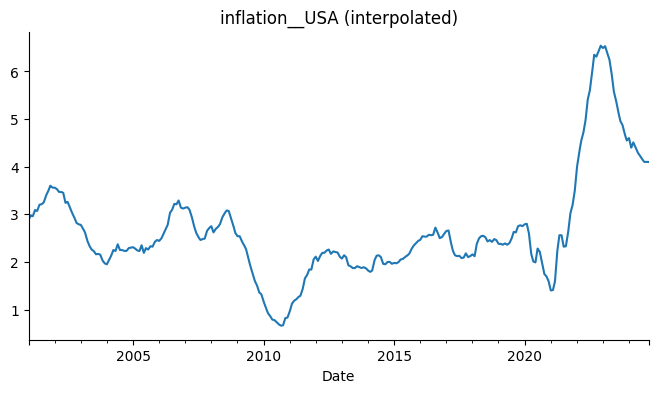

In [ ]:
from matplotlib import pyplot as plt
df_expanded_interpolate['inflation_USA'].plot(kind='line', figsize=(8, 4), title='inflation__USA (interpolated)')
plt.gca().spines[['top', 'right']].set_visible(False)

Korea Unemployment rate

In [ ]:
import pandas as pd
from scipy.interpolate import interp1d

# Sample monthly data (replace with your actual data)
unemployment = pd.read_excel('/content/drive/MyDrive/time-series-project-datasets/Unemployment.xlsx')

#monthly_inflation['inflation_china'] = monthly_inflation['inflation_china'].astype('float64')
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              286 non-null    datetime64[ns]
 1   unemployment_kor  286 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [ ]:
# Create a Pandas DataFrame
df_u = pd.DataFrame(unemployment)

# Convert 'Month' column to datetime format
df_u = df_u.set_index('Date')
df_u = df_u.loc['2001-01-01':'2024-10-1']

In [ ]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 2001-01-01 to 2024-10-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unemployment_kor  286 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [ ]:
df_u

,unemployment_kor
Date,
2001-01-01,4.4
2001-02-01,4.7
2001-03-01,4.6
2001-04-01,4.1
2001-05-01,3.9
...,...
2024-06-01,2.8
2024-07-01,2.5
2024-08-01,2.4


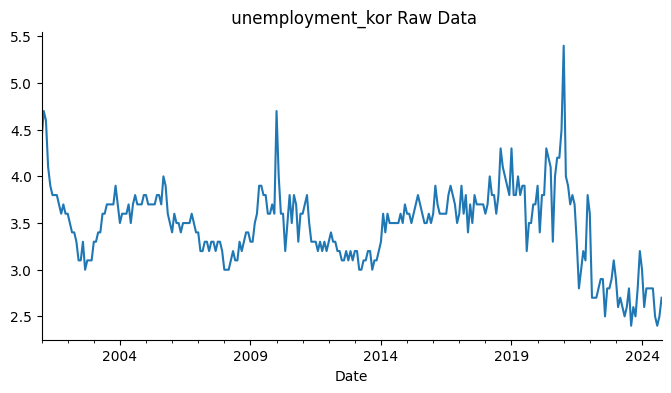

In [ ]:
from matplotlib import pyplot as plt
df_u['unemployment_kor'].plot(kind='line', figsize=(8, 4), title=' unemployment_kor Raw Data')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Expand the DataFrame to daily level
df_expanded_copies_u = df_u.resample('D').ffill()
df_expanded_interpolate_u = df_u.resample('D').interpolate()


In [ ]:
df_expanded_copies_u

,unemployment_kor
Date,
2001-01-01,4.4
2001-01-02,4.4
2001-01-03,4.4
2001-01-04,4.4
2001-01-05,4.4
...,...
2024-09-27,2.5
2024-09-28,2.5
2024-09-29,2.5


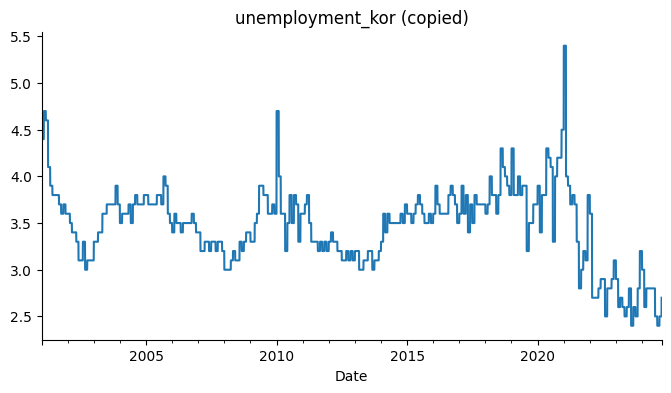

In [ ]:
from matplotlib import pyplot as plt
df_expanded_copies_u['unemployment_kor'].plot(kind='line', figsize=(8, 4), title='unemployment_kor (copied)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_expanded_interpolate_u

,unemployment_kor
Date,
2001-01-01,4.400000
2001-01-02,4.409677
2001-01-03,4.419355
2001-01-04,4.429032
2001-01-05,4.438710
...,...
2024-09-27,2.673333
2024-09-28,2.680000
2024-09-29,2.686667


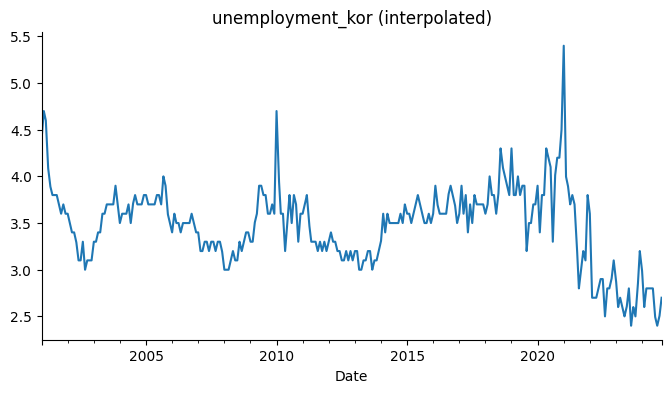

In [ ]:
from matplotlib import pyplot as plt
df_expanded_interpolate_u['unemployment_kor'].plot(kind='line', figsize=(8, 4), title='unemployment_kor (interpolated)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
merged_copied = pd.merge(df_expanded_copies, df_expanded_copies_u, on='Date')
merged_copied = merged_copied.loc[:'2024-09-30']
merged_copied

,inflation_USA,inflation_kor,inflation_china,unemployment_kor
Date,,,,
2001-01-01,2.88,3.44,0.72,4.4
2001-01-02,2.88,3.44,0.72,4.4
2001-01-03,2.88,3.44,0.72,4.4
2001-01-04,2.88,3.44,0.72,4.4
2001-01-05,2.88,3.44,0.72,4.4
...,...,...,...,...
2024-09-26,NaN,1.61,0.10,2.5
2024-09-27,NaN,1.61,0.10,2.5
2024-09-28,NaN,1.61,0.10,2.5


In [ ]:
merged_copied.to_csv('merged_copied.csv')

In [ ]:
merged_interpolate = pd.merge(df_expanded_interpolate, df_expanded_interpolate_u, on='Date')
merged_interpolate = merged_interpolate.loc[:'2024-09-30']
merged_interpolate

,inflation_USA,inflation_kor,inflation_china,unemployment_kor
Date,,,,
2001-01-01,2.880000,3.440000,0.720000,4.400000
2001-01-02,2.883226,3.446129,0.720000,4.409677
2001-01-03,2.886452,3.452258,0.720000,4.419355
2001-01-04,2.889677,3.458387,0.720000,4.429032
2001-01-05,2.892903,3.464516,0.720000,4.438710
...,...,...,...,...
2024-09-26,4.100000,1.268333,0.183333,2.666667
2024-09-27,4.100000,1.254667,0.186667,2.673333
2024-09-28,4.100000,1.241000,0.190000,2.680000


In [ ]:
merged_interpolate.to_csv('merged_interpolate.csv')

Stock data

In [1]:
!pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 5.0 MB/s eta 0:00:00


In [2]:
#005930 삼전
import FinanceDataReader as fdr
fdr.__version__
df = fdr.DataReader('005930')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-08-02,6100,6170,5930,6070,743825,NaN
2000-08-03,6180,6180,5970,6030,556342,-0.006590
2000-08-04,5930,6010,5850,5920,472137,-0.018242
2000-08-07,5740,5770,5580,5580,575355,-0.057432
2000-08-08,5660,5750,5570,5580,669550,0.000000
2000-08-09,5680,6040,5680,6000,791495,0.075269
2000-08-10,6000,6160,5860,6160,816612,0.026667
2000-08-11,6000,6070,5880,5960,676890,-0.032468
2000-08-14,6060,6160,6000,6020,474664,0.010067


In [3]:
df = df.loc['2001-01-01':'2024-09-29']
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2001-01-02,3160,3380,3140,3350,789127,0.060127
2001-01-03,3229,3420,3220,3370,757143,0.005970
2001-01-04,3790,3870,3660,3780,2398248,0.121662
2001-01-05,3760,3920,3700,3900,1562744,0.031746
2001-01-08,3820,3910,3780,3880,845911,-0.005128
...,...,...,...,...,...,...
2024-09-23,62300,63500,62200,62600,28542376,-0.006349
2024-09-24,62800,63400,62400,63200,26957500,0.009585
2024-09-25,63800,64200,62200,62200,28652438,-0.015823


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5864 entries, 2001-01-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5864 non-null   int64  
 1   High    5864 non-null   int64  
 2   Low     5864 non-null   int64  
 3   Close   5864 non-null   int64  
 4   Volume  5864 non-null   int64  
 5   Change  5864 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 320.7 KB


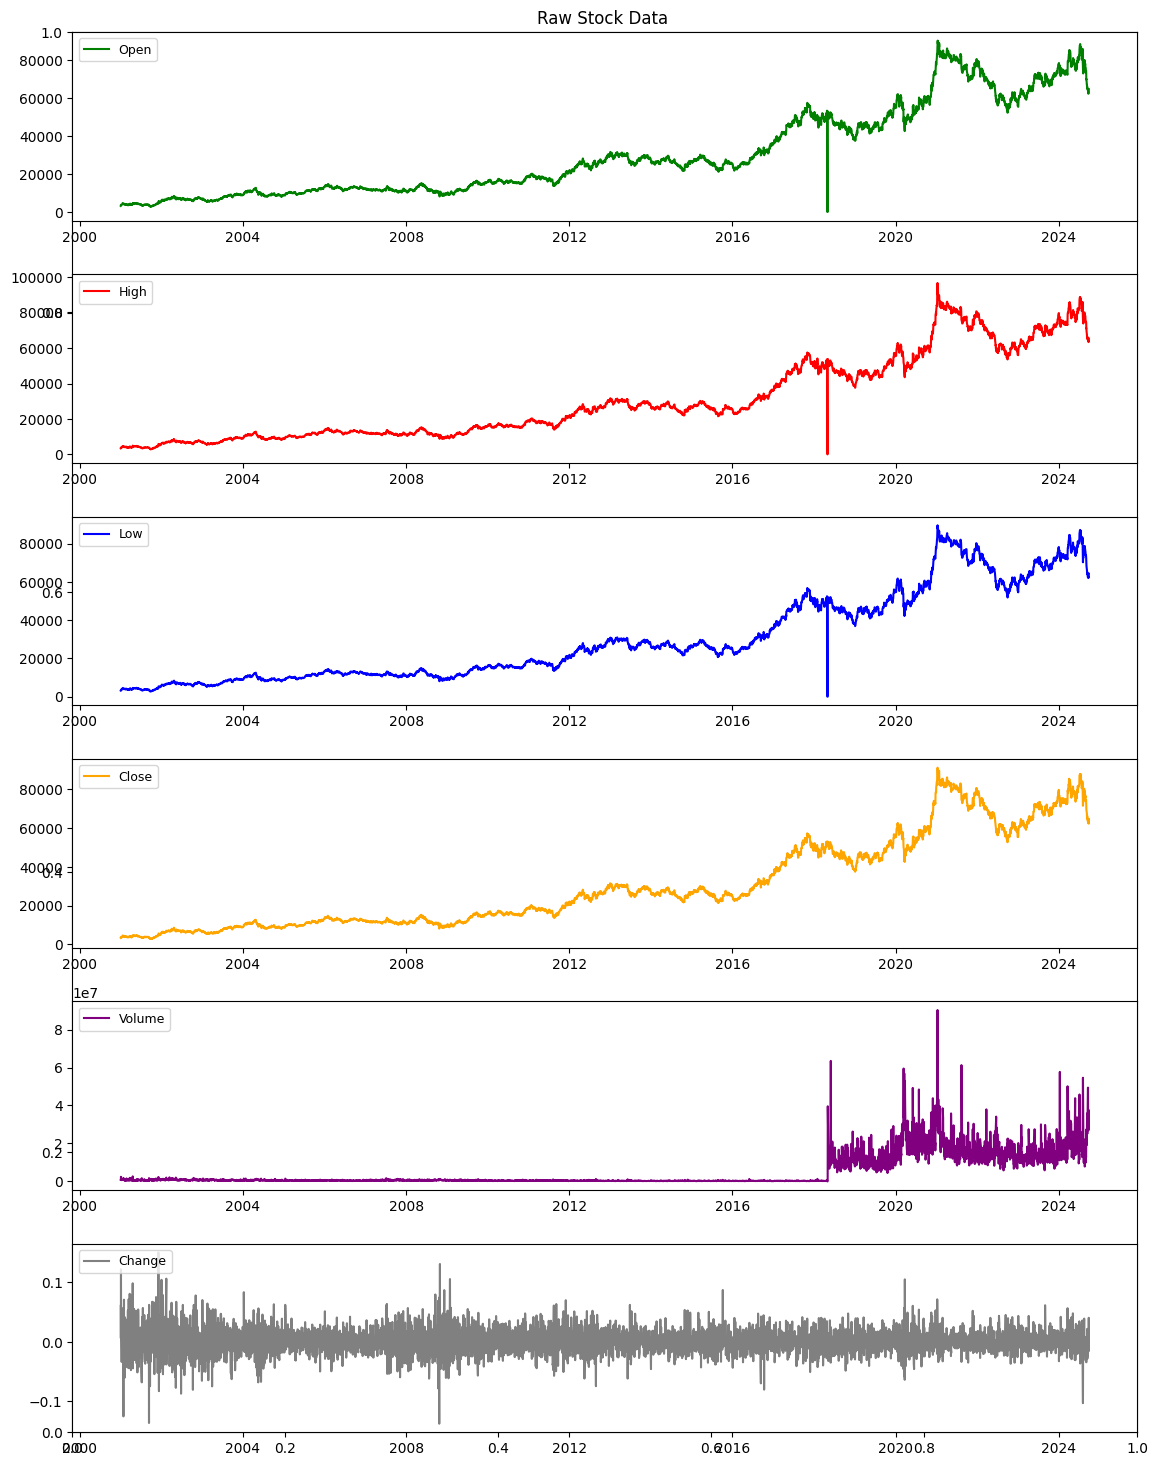

In [10]:
plt.figure(figsize=(12,15))
plt.title('Raw Stock Data ')
plt.subplot(6,1,1)
plt.plot(df['Open'], label='Open', color = 'green')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(6,1,2)
plt.plot(df['High'], label='High', color = 'red')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(6,1,3)
plt.plot(df['Low'], label='Low', color = 'blue')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(6,1,4)
plt.plot(df['Close'], label='Close', color = 'orange')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(6,1,5)
plt.plot(df['Volume'], label='Volume', color = 'purple')
plt.legend(loc='upper left',fontsize=9)

plt.subplot(6,1,6)
plt.plot(df['Change'], label='Change', color = 'grey')
plt.legend(loc='upper left',fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('stock_data.csv')

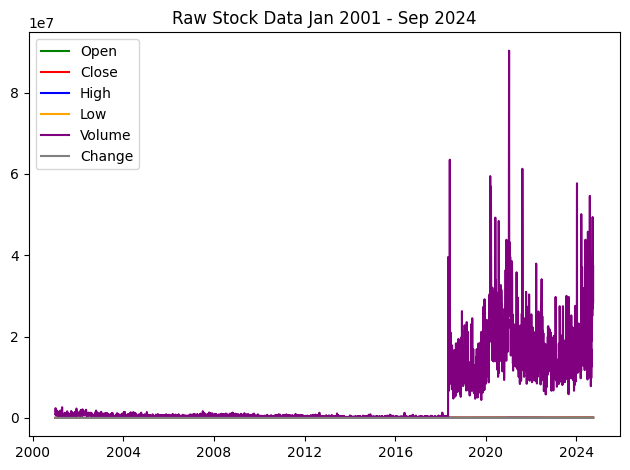

In [4]:
from matplotlib import pyplot as plt
plt.figsize = (12, 8)
plt.plot(df['Open'], label='Open', color = 'green')
plt.plot(df['Close'], label='Close', color = 'red')
plt.plot(df['High'], label='High', color = 'blue')
plt.plot(df['Low'], label='Low', color = 'orange')
plt.plot(df['Volume'], label='Volume', color = 'purple')
plt.plot(df['Change'], label='Change', color = 'grey')
plt.title('Raw Stock Data Jan 2001 - Sep 2024')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
merged_copied = pd.read_csv('/content/drive/MyDrive/time-series-project-datasets/merged_copied.csv')
merged_copied